<a href="https://colab.research.google.com/github/chrithomas/NATOPs-classification/blob/main/ML_Classification_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from itertools import cycle
import matplotlib.pyplot as plt
import math

In [ ]:
# Load data
drive.mount('/content/drive/')
natops_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NATOPS_sid20-C_TRAIN_su.csv')
natops_data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,isTest,fea2,fea3,fea4,fea5,fea6,fea7,fea8,fea9,fea10,...,fea14,fea15,fea16,fea17,fea18,fea19,fea20,fea21,sid,class
0,0,0.117647,0.039216,0.0,0.137255,0.019608,0.098039,0.294118,0.0,0.0,...,0.0,0.0,0.0,0.0,0.137255,0.0,0.0,0.0,1,3
1,0,0.117647,0.039216,0.0,0.137255,0.019608,0.098039,0.294118,0.0,0.0,...,0.0,0.0,0.0,0.0,0.137255,0.0,0.0,0.0,1,3
2,0,0.117647,0.039216,0.0,0.137255,0.019608,0.098039,0.294118,0.0,0.0,...,0.0,0.0,0.0,0.0,0.137255,0.0,0.0,0.0,1,3
3,0,0.117647,0.039216,0.0,0.137255,0.019608,0.098039,0.294118,0.0,0.0,...,0.0,0.0,0.0,0.0,0.137255,0.0,0.0,0.0,1,3
4,0,0.117647,0.039216,0.0,0.137255,0.019608,0.098039,0.294118,0.0,0.0,...,0.0,0.0,0.0,0.0,0.137255,0.0,0.0,0.0,1,3


In [ ]:
# Standardize and Separate Data test/train, (x=features / y=labels)

# Separate test/train data
test_data = natops_data[natops_data['isTest'] == 1]
train_data = natops_data[natops_data['isTest'] == 0]

# Exclude columns isTest, sid, and class to get features
X_featuresTest = test_data.iloc[:, 1:-2]
X_featuresTrain = train_data.iloc[:, 1:-2]

# Get labels
Y_labelsTest = test_data['class']
Y_labelsTrain = train_data['class']

# Normalize features data
scaler = StandardScaler()
X_featuresTest = scaler.fit_transform(X_featuresTest)
X_featuresTrain = scaler.fit_transform(X_featuresTrain)

K-Nearest Neighbors Classification

In [ ]:
# finding optimal K value (takes about 20 minutes with max_K = sqrt(N) where N = num features)
# K value is the number of neighbors to consider when classifying each point
max_K = round(math.sqrt(X_featuresTest.size + X_featuresTrain.size))
accuracy = []

# compute KNN accuracy for K=1 to K=sqrt(N) to find K with maximum accuracy
for k in range(1, max_K+1):
  knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
  knn.fit(X_featuresTrain, Y_labelsTrain)
  k_predict = knn.predict(X_featuresTest)
  accuracy.append(accuracy_score(Y_labelsTest, k_predict))

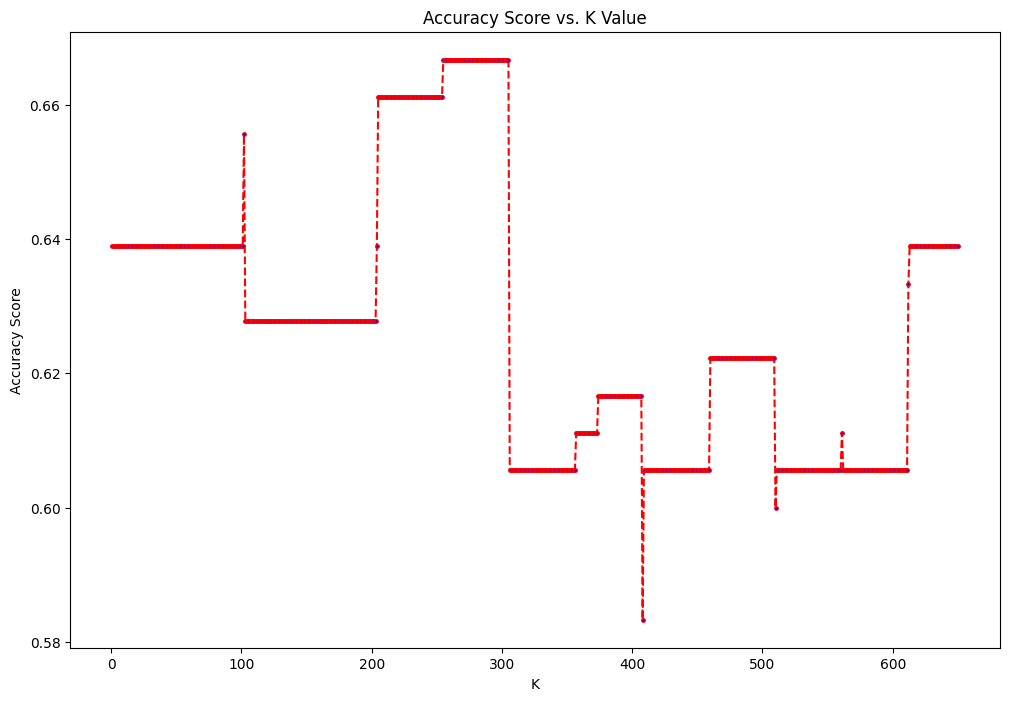

best K =  255  with Accuracy =  0.6667


In [ ]:
# Visualize Accuracy vs K to find optimal K value
plt.figure(figsize=(12,8))
plt.plot(range(1, max_K+1), accuracy, color='red', linestyle='dashed', marker='.', markerfacecolor='blue', markersize=5)
plt.title('Accuracy Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()
best_index = np.argmax(accuracy)
optimal_k = range(1,max_K+1)[best_index]
print("best K = ", optimal_k, " with Accuracy = ", round(accuracy[best_index], 4))

In [ ]:
# K Nearest Neighbors (KNN) model with optimal k found above
optimal_k = 255
knn = KNeighborsClassifier(n_neighbors = optimal_k, metric = 'minkowski', p = 2)
knn.fit(X_featuresTrain, Y_labelsTrain)

Y_predict = knn.predict(X_featuresTest)



*   **Accuracy:** proportion of correctly classified instances out of all instances
*   **Precision:** proportion of true positives out of all positive predictions
*   **Recall:** proportion of true positives out of all actual positive instances
*   **Confusion Matrix Format:**

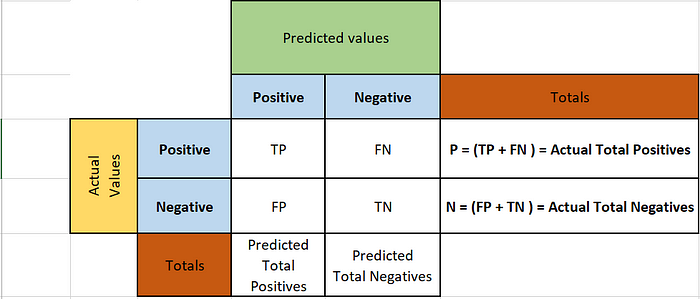







With K = 255
Accuracy Score:  0.6667
Precision:  0.6655
Recall:  0.6667
Confusion Matrix:
 [[1275  255    0    0    0    0]
 [ 204  612  714    0    0    0]
 [ 204  510  816    0    0    0]
 [   0    0    0 1173  357    0]
 [   0    0    0  765  765    0]
 [   0    0    0    0   51 1479]]
Model 0 with score: 0.9388888888888889
Model 1 with score: 0.8277777777777777
Model 2 with score: 0.8444444444444444
Model 3 with score: 0.8777777777777778
Model 4 with score: 0.8722222222222222
Model 5 with score: 0.9944444444444445
Average Area Under Curve (One Vs Rest Multi-Class ROC) = 0.913462962962963


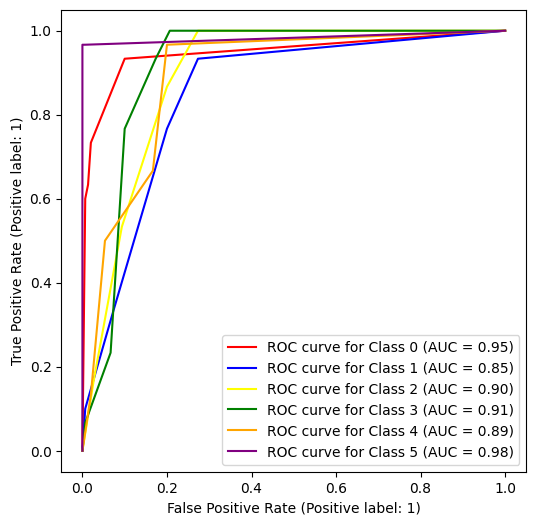

In [ ]:
# KNN Model Evaluation (Confusion Matrix, Accuracy, Precision, Recall (explained above))
confusion = confusion_matrix(Y_labelsTest, Y_predict)
accuracyScore = accuracy_score(Y_labelsTest, Y_predict)
precision = precision_score(Y_labelsTest, Y_predict, average='weighted')
recall = recall_score(Y_labelsTest, Y_predict, average='weighted')

print("With K =", optimal_k)
print("Accuracy Score: ", round(accuracyScore, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Confusion Matrix:\n", confusion)

In [ ]:
# Multi-Class ROC (Reciever Operating Characteristic) Curve for KNN
n_classes = 6
fpr = [0]*n_classes
tpr = [0]*n_classes
thresholds = [0]*n_classes
auc_score = [0]*n_classes

# binarize labels for One vs Rest Classification
Y_target_test = label_binarize(Y_labelsTest, classes=range(n_classes))
Y_target_train = label_binarize(Y_labelsTrain, classes=range(n_classes))

# One vs Rest Classification for ROC
# Binarize classes to create ROC curve for each possible class
# then average Area Under Curve for each One vs Rest ROC to find Multi-Class AUC
models = []
for i in range(n_classes):
  knn_bin = KNeighborsClassifier(n_neighbors = optimal_k, metric = 'minkowski', p = 2).fit(X_featuresTrain, Y_target_train[:, i])
  models.append(knn_bin)
  print("Model", i, "with score:", knn_bin.score(X_featuresTest, Y_target_test[:, i]))

ovrClassifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = optimal_k, metric = 'minkowski', p = 2)).fit(X_featuresTrain, Y_target_train)
y_pred_proba = ovrClassifier.predict_proba(X_featuresTest)

# Calculate False-Positive Rate, True-Positive Rate, and Threshold (Upper-Left Point of ROC Curve) from each binarized model
for i in range(n_classes):
  fpr[i], tpr[i], thresholds[i] = roc_curve(Y_target_test[:, i], y_pred_proba[:, i])
  auc_score[i] = auc(fpr[i], tpr[i])

print("Average Area Under Curve (One Vs Rest Multi-Class ROC of KNN Classifier) =", sum(auc_score) / n_classes)

# Display ROC curves on a single plot
fig,ax = plt.subplots(figsize=(6,6))
colors = cycle(["red", "blue", "yellow", "green", "orange", "purple"])
for class_id, color in zip(range(n_classes), colors):
  RocCurveDisplay.from_predictions(Y_target_test[:, class_id], y_pred_proba[:, class_id], name=f"ROC curve for Class {class_id}", color=color, ax=ax)


Multi-Layer Perceptron (MLP) Classifier

In [ ]:
# MLP with Mini-Batch SGD (Stochastic Gradient Descent)
modelMBGD = MLPClassifier(solver='sgd', batch_size=64)

# MLP with Adam Optimizer (SGD with adaptive learning rate)
modelAdam = MLPClassifier(solver='adam')

# Train Models with Training Data
modelMBGD.fit(X_featuresTrain, Y_labelsTrain)
modelAdam.fit(X_featuresTrain, Y_labelsTrain)

# Evaluate Models
scoreMBGD = modelMBGD.score(X_featuresTest, Y_labelsTest)
scoreAdam = modelAdam.score(X_featuresTest, Y_labelsTest)

scores = {
          "Mini-Batch Gradient Descent" : scoreMBGD,
          "Adam Optimizer" : scoreAdam,
          }

# Output Results
maxKey = ""
maxVal = 0
for key, val in scores.items():
  if val > maxVal: maxKey, maxVal = key, val
  print(key, "score =", val)
print("Best MLP Classifier Solver =", maxKey, "with score of", maxVal)

In [ ]:
# MLP Classifier Hyper-Parameter Tuning using Grid Search
# Results: Best Score = 0.6556 using Parameters {activation : relu, batch_size : 64, learning_rate : constant, solver : adam}
# (run with all parameters take about 1 hour) 3 * 2 * 4 * 2 * (cv=5) = 240 total jobs for exhaustive Grid Search
mlp = MLPClassifier()
parameters = {
    'activation' : ['logistic', 'relu', 'tanh'],
    'solver' : ['sgd', 'adam'],
    'batch_size' : [32, 64, 128, 256],
    'learning_rate' : ['constant', 'adaptive'],
    'random_state' : [1]
}
grid = GridSearchCV(mlp, param_grid=parameters, n_jobs=-1)
grid_result = grid.fit(X_featuresTrain, Y_labelsTrain)
print("Best Score =", grid_result.best_score_, " using Parameters:", grid_result.best_params_)

Best Score = 0.6555555555555556  using Parameters: {'activation': 'relu', 'batch_size': 64, 'learning_rate': 'constant', 'random_state': 1, 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# MLP Classifier using best parameters from above
clf = MLPClassifier(activation='relu', solver='adam', batch_size=64, learning_rate='constant', random_state=1, verbose=False, max_iter=500)
clf.fit(X_featuresTrain, Y_labelsTrain)
clf_predict = clf.predict(X_featuresTest)
report = classification_report(Y_labelsTest, clf_predict)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1530
           1       0.41      0.47      0.44      1530
           2       0.44      0.47      0.45      1530
           3       0.59      0.67      0.62      1530
           4       0.62      0.43      0.51      1530
           5       0.97      0.93      0.95      1530

    accuracy                           0.62      9180
   macro avg       0.63      0.62      0.62      9180
weighted avg       0.63      0.62      0.62      9180



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model 0 with score: 0.9333333333333333
Model 1 with score: 0.8277777777777777
Model 2 with score: 0.8388888888888889
Model 3 with score: 0.8444444444444444
Model 4 with score: 0.8833333333333333
Model 5 with score: 1.0
Average Area Under Curve (One Vs Rest Multi-Class ROC of MLP Classifier) = 0.9105925925925926


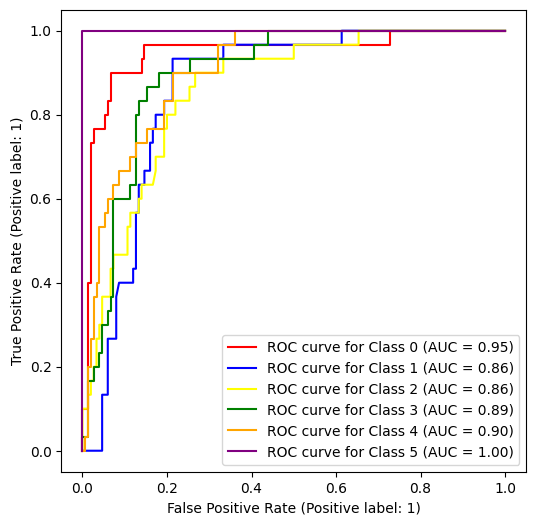

In [ ]:
# Multi-Class ROC Curve for MLP
n_classes = 6
fpr = [0]*n_classes
tpr = [0]*n_classes
thresholds = [0]*n_classes
auc_score = [0]*n_classes

# binarize labels for One vs Rest Classification
Y_target_test = label_binarize(Y_labelsTest, classes=range(n_classes))
Y_target_train = label_binarize(Y_labelsTrain, classes=range(n_classes))

# One vs Rest Classification for ROC
# Binarize classes to create ROC curve for each possible class
# then average Area Under Curve for each One vs Rest ROC to find Multi-Class AUC
models = []
for i in range(n_classes):
  mlp_bin = MLPClassifier(activation='relu', solver='adam', batch_size=64, learning_rate='constant', random_state=1, verbose=False, max_iter=500).fit(X_featuresTrain, Y_target_train[:, i])
  models.append(mlp_bin)
  print("Model", i, "with score:", mlp_bin.score(X_featuresTest, Y_target_test[:, i]))

ovrClassifier = OneVsRestClassifier(MLPClassifier(activation='relu', solver='adam', batch_size=64, learning_rate='constant', random_state=1, verbose=False, max_iter=500)).fit(X_featuresTrain, Y_target_train)
y_pred_proba = ovrClassifier.predict_proba(X_featuresTest)

# Calculate False-Positive Rate, True-Positive Rate, and Threshold from each binarized model
for i in range(n_classes):
  fpr[i], tpr[i], thresholds[i] = roc_curve(Y_target_test[:, i], y_pred_proba[:, i])
  auc_score[i] = auc(fpr[i], tpr[i])

print("Average Area Under Curve (One Vs Rest Multi-Class ROC of MLP Classifier) =", sum(auc_score) / n_classes)

# Display ROC curves on a single plot
fig,ax = plt.subplots(figsize=(6,6))
colors = cycle(["red", "blue", "yellow", "green", "orange", "purple"])
for class_id, color in zip(range(n_classes), colors):
  RocCurveDisplay.from_predictions(Y_target_test[:, class_id], y_pred_proba[:, class_id], name=f"ROC curve for Class {class_id}", color=color, ax=ax)

References:


*   https://www.geeksforgeeks.org/k-nearest-neighbors-with-python-ml/
*   https://plainenglish.io/blog/understanding-confusion-matrix-and-applying-it-on-knn-classifier-on-iris-dataset-b57f85d05cd8
*   https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
*   https://www.geeksforgeeks.org/compare-stochastic-learning-strategies-for-mlpclassifier-in-scikit-learn/
*   https://www.datacamp.com/tutorial/parameter-optimization-machine-learning-models
*   https://www.geeksforgeeks.org/multiclass-receiver-operating-characteristic-roc-in-scikit-learn/






